In [1]:
with open ("/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/INBOX/1-24023", "r") as myfile:
    data = myfile.read().splitlines()

In [2]:
import os


In [3]:
import os

inbox_direc = '/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/INBOX'

day = []
mon = []
year = []
hour = []
minute = []
sec = []

for filename in os.listdir(inbox_direc):
    #print(os.path.join(inbox_direc, filename))
    with open(os.path.join(inbox_direc, filename),"r") as f :
        data= f.read().splitlines()
        
        data = data[2][13:32]
        d = datetime.strptime(data, "%d %b %Y  %H:%M:%S")
        day.append(d.day)
        mon.append(d.month)
        year.append(d.year)
        hour.append(d.hour)
        minute.append(d.minute)
        sec.append(d.second)


NameError: name 'datetime' is not defined

In [4]:
import pandas as pd
df = pd.DataFrame()
df['day'] = day
df['mon'] = mon
df['year'] = year
df['hour'] = hour
df['min'] = minute
df['sec'] = sec

In [5]:
df.head()

,day,mon,year,hour,min,sec


In [6]:
print(df.to_string())

Empty DataFrame
Columns: [day, mon, year, hour, min, sec]
Index: []


In [7]:
recent_df = df.loc[df['mon'] == 10]

In [8]:
print(recent_df.to_string())

Empty DataFrame
Columns: [day, mon, year, hour, min, sec]
Index: []


In [9]:
mails_per_hour = recent_df.groupby(['day','mon', 'hour']).size().sort_values(ascending=False).reset_index(name='count') 
print(mails_per_hour)

Empty DataFrame
Columns: [day, mon, hour, count]
Index: []


(array([0., 0., 0., 0., 0.]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

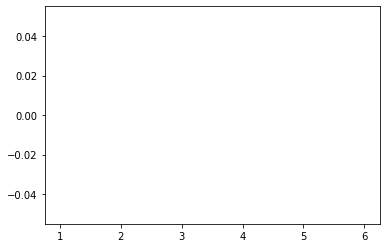

In [10]:
### mails per hour..
import matplotlib.pyplot as plt
hour_dict = {}
plt.hist(mails_per_hour['count'], bins = [1,2,3,4,5,6])

In [11]:
    
day_dict = {}

for i in recent_df['day']:
    if(i in day_dict):
        day_dict[i] = day_dict[i] + 1
    else :
        day_dict[i] = 1
print(day_dict)
day_dict_count_list = day_dict.values()
print(day_dict_count_list)

{}
dict_values([])


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

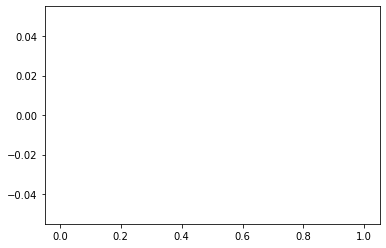

In [12]:
import matplotlib.pyplot as plt
plt.hist(day_dict_count_list)

# analysing mails per hour..

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

### Only Sept.

In [14]:
inbox_direc = '/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/mails_sept'

day = []
mon = []
year = []
hour = []
minute = []
sec = []

for filename in os.listdir(inbox_direc):
    with open(os.path.join(inbox_direc, filename),"r") as f :
        data= f.read().splitlines()
        
        data = data[2][13:32]
        try : 
            d = datetime.strptime(data, "%d %b %Y  %H:%M:%S")
        except:
            continue
        day.append(d.day)
        mon.append(d.month)
        year.append(d.year)
        hour.append( (d.hour +12)%24 ) 
        minute.append(d.minute)
        sec.append(d.second)

df = pd.DataFrame()
df['day'] = day
df['mon'] = mon
df['year'] = year
df['hour'] = hour
df['min'] = minute
df['sec'] = sec

mails_per_hour = df.groupby(['day','mon', 'hour']).size().sort_values(ascending=False).reset_index(name='count') 
print(mails_per_hour)

     day  mon  hour  count
0     12    9    15     10
1      2    9     9      9
2     29    9    17      8
3     13    9    10      8
4     16    9    13      7
..   ...  ...   ...    ...
401   11    9    22      1
402   11    9    20      1
403   11    9    18      1
404   11    9    17      1
405    9    9    19      1

[406 rows x 4 columns]


In [15]:
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 8]) )
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 9]) )
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 10]) )


8
398
0


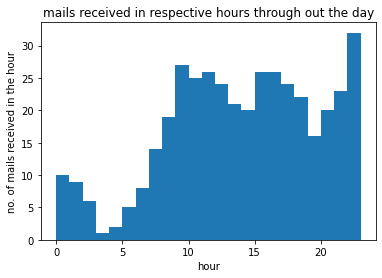

In [16]:
plt.hist( mails_per_hour['hour'],bins = 23 )
plt.xlabel("hour")
plt.ylabel("no. of mails received in the hour")
plt.title("mails received in respective hours through out the day")
plt.show()

288


(array([108.,  73.,  55.,  20.,  21.,   6.,   2.,   2.,   0.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

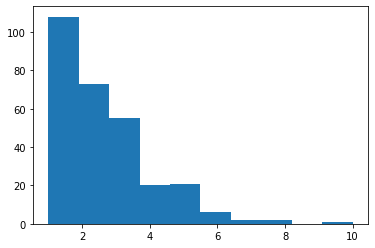

In [17]:
'''
Filtering all the mails received throughout september from 10 am to 7pm 
'''

working_hrs = mails_per_hour.loc[ (mails_per_hour['mon'] ==9 ) & ( (mails_per_hour['hour'] >= 10)  & (mails_per_hour['hour'] <= 22) ) ]
working_hrs = working_hrs.sort_values(by="day", axis=0, ascending=True, inplace=False, kind='quicksort')
print(len(working_hrs))
plt.hist( working_hrs['count'] )


{0: 102, 3: 55, 1: 108, 2: 73, 4: 20, 5: 21, 10: 1, 8: 2, 6: 6, 7: 2}


<BarContainer object of 10 artists>

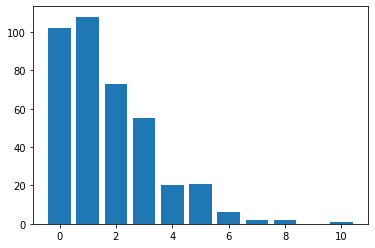

In [18]:
hr_dict = {0: 30*(13) - len(working_hrs)}
for i in working_hrs['count']:
    if(i in hr_dict):
        hr_dict[i] = hr_dict[i] + 1
    else :
        hr_dict[i] = 1
print(hr_dict)
plt.bar(hr_dict.keys(), hr_dict.values())

In [19]:
print(hr_dict)

count = 0
mean = 0
for key, val in hr_dict.items():
    count = count + val
    mean = mean +  key*val
    
mean = mean/count
print(mean)

{0: 102, 3: 55, 1: 108, 2: 73, 4: 20, 5: 21, 10: 1, 8: 2, 6: 6, 7: 2}
1.7435897435897436


In [20]:
def poisson_pmf(x_list, lam):
    ans = []
    for x in x_list:
        y = np.exp(-1*lam)*pow(lam,x)/(math.factorial(x))
        ans.append(y)
    return ans

a = np.sort(x.copy())
f = poisson_pmf(a, mean)
plt.plot(a,f)

NameError: name 'x' is not defined

In [ ]:
pmf = list(hr_dict.values())
pmf = pmf / np.sum(pmf)
x = list(hr_dict.keys())
plt.bar(x, pmf, color = 'blue', label = 'Bar plot of frequency') 
plt.plot(a,f, color = 'red', label = 'poisson modelling for calculated mean')
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
plt.title("Modelling as a poisson distribution (lam = %.2f)"%(lam))
plt.show()


The above plot is for the month of september : mails received between 10 am to 10 pm

# Sept + Aug

In [ ]:
inbox_direc = '/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/INBOX'

day = []
mon = []
year = []
hour = []
minute = []
sec = []

for filename in os.listdir(inbox_direc):
    with open(os.path.join(inbox_direc, filename),"r") as f :
        data= f.read().splitlines()
        
        data = data[2][13:32]
        try : 
            d = datetime.strptime(data, "%d %b %Y  %H:%M:%S")
        except:
            continue
        day.append(d.day)
        mon.append(d.month)
        year.append(d.year)
        hour.append( (d.hour + 12)%24 ) 
        minute.append(d.minute)
        sec.append(d.second)

df = pd.DataFrame()
df['day'] = day
df['mon'] = mon
df['year'] = year
df['hour'] = hour
df['min'] = minute
df['sec'] = sec

mails_per_hour = df.groupby(['day','mon', 'hour']).size().sort_values(ascending=False).reset_index(name='count') 
print(mails_per_hour)

In [ ]:
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 8]) )
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 9]) )
print( len(mails_per_hour.loc[mails_per_hour['mon'] == 10]) )


In [ ]:
plt.hist( mails_per_hour['hour'],bins = 23 )
plt.xlabel("hour")
plt.ylabel("no. of mails received in the hour")
plt.title("mails received in respective hours through out the day")
plt.show()

In [ ]:
'''
Filtering all the mails received throughout september from 10 am to 7pm 
'''

working_hrs = mails_per_hour.loc[ (mails_per_hour['mon'] >=8 ) & np.logical_and( (mails_per_hour['hour'] >= 10) , (mails_per_hour['hour'] <= 22) ) ]
working_hrs = working_hrs.sort_values(by="day", axis=0, ascending=True, inplace=False, kind='quicksort')
print(len(working_hrs))
plt.hist( working_hrs['count'] )


In [ ]:
hr_dict = {0: 60*(13) - len(working_hrs)}
for i in working_hrs['count']:
    if(i in hr_dict):
        hr_dict[i] = hr_dict[i] + 1
    else :
        hr_dict[i] = 1
print(hr_dict)
plt.bar(hr_dict.keys(), hr_dict.values())

In [ ]:
print(hr_dict)

count = 0
mean = 0
for key, val in hr_dict.items():
    count = count + val
    mean = mean +  key*val
    
mean = mean/count
print(mean)

In [ ]:
def poisson_pmf(x_list, lam):
    ans = []
    for x in x_list:
        y = np.exp(-1*lam)*pow(lam,x)/(math.factorial(x))
        ans.append(y)
    return ans

a = np.sort(x.copy())
f = poisson_pmf(a, mean)
plt.plot(a,f)

In [ ]:
pmf = list(hr_dict.values())
pmf = pmf / np.sum(pmf)
x = list(hr_dict.keys())
plt.bar(x, pmf, color = 'blue', label = 'Bar plot of frequency') 
plt.plot(a,f, color = 'red', label = 'poisson modelling for calculated mean')
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
plt.title("Modelling as a poisson distribution (lam = %.2f)"%(mean))
plt.show()


Both for Sept and Oct ... during hours 10 t0 22 pm